# PGM - 2. Markov chains and hidden markov chains 

Чернявский Александр Сергеевич

## 1. Генерация текста при помощи марковских цепей

В коде реализован алгоритм генерации текста на основе марковских цепей.
- Реализуйте марковскую цепь более высокого порядка, которая выводит следующее слово не на основании одного предыдующего слова, а на основании $n$ последних.
- Реализуйте алгоритм генерации текста на основе марковской цепи произвольного порядка (можно использовать цепи более низкого порядка для первых слов в предложении и если данный набор из $n$ слов не встречался в обучающей выборке)
- Поэкспериментируйте с генераторами текста. С какого размера входного текста цепь первого порядка генерирует более-менее осмысленные предложения? А цепь второго порядка?

In [ ]:
import random

class Dictogram(dict):
    def __init__(self, iterable = None):
        super().__init__()
        self.num_unique_words = 0  # число уникальных ключей в распределении
        self.num_words = 0  # общее количество всех слов в распределении
        if iterable:
            self.update(iterable)

    def update(self, iterable) -> None:
        for item in iterable:
            if item in self:
                self[item] += 1
                self.num_words += 1
            else:
                self[item] = 1
                self.num_unique_words += 1
                self.num_words += 1

    def count(self, item: str) -> int:
        return self[item] if item in self else 0


    def return_random_word(self, seed: int = 42) -> str:
        # random.seed(seed)
        return random.sample(list(self), 1)[0]
        
    def return_weighted_random_word(self, seed: int = 42) -> str:
        # random.seed(seed)
    
        random_int = random.randint(0, self.num_words - 1)
        index = 0
        list_of_keys = list(self)
        for i in range(self.num_unique_words):
            index += self[list_of_keys[i]]
            if(index > random_int):
                return list_of_keys[i]

In [ ]:
def fit_markov_model(data):
    markov_model = dict()

    for i in range(len(data) - 1):
        if data[i] in markov_model:
            markov_model[data[i]].update([data[i + 1]])
        else:
            markov_model[data[i]] = Dictogram([data[i + 1]])
    return markov_model

In [ ]:
def fit_higher_order_markov_model(data, order: int, aux_data: dict = None):
    """
    All to do is to add a window size of `order` size 
    """
    markov_model = dict() if aux_data is None else aux_data
    for i in range(0, len(data) - order):
        #skip-grams
        window = tuple(data[i: i + order])
        
        if window in markov_model:
            markov_model[window].update([data[i + order]])
        else:
            markov_model[window] = Dictogram([data[i + order]])
    return markov_model

In [ ]:
def generate_random_sentence(length, markov_model, max_order = 1):
    def generate_random_start(model: dict):
        words = random.choice(list(model.keys())) 
        return [words] if isinstance(words, str) else list(words)

    sentence = generate_random_start(markov_model)
    
    for i in range(0, length):
        while max_order >= 0:
            try:
                window = sentence[-max_order:]
                continuation = tuple(window) 
                sentence.append(
                    markov_model[continuation].return_weighted_random_word()
                )
                break
            except KeyError:
                max_order -= 1

    sentence[0] = sentence[0].capitalize()
    return " ".join(sentence) + "."

В качестве корпуса текста возьмём <<Евгения Онегина>> А.С. Пушкина

In [ ]:
import os, re
def flatten(l):
    return [item for sublist in l for item in sublist]

if not os.path.exists('onegin.txt'):
    !wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    o_text = iofile.readlines()
    
data = flatten([re.sub(r'[^\w]', ' ', x).replace('\t\t', '').split() for x in o_text])

dumb_data = list(random.sample(data, 10000))

In [ ]:
mc = fit_markov_model(data)
mc_dumb = fit_markov_model(dumb_data)

for order in [2, 3, 4, 5]:
    mc5 = fit_higher_order_markov_model(data, order, mc)
    mc5_dumb = fit_higher_order_markov_model(dumb_data, order, mc_dumb)


for order in [2, 3]:
    mc3 = fit_higher_order_markov_model(data, order, mc)
    mc3_dumb = fit_higher_order_markov_model(dumb_data, order, mc_dumb)


In [ ]:
#третий порядок
for i in range(6):
  print(generate_random_sentence(7, mc3, 3))
print(40*"#")
for i in range(6):
  print(generate_random_sentence(7, mc3_dumb, 3))

Нибудь он сердце тронет И сохраненная судьбой Быть может в.
И мы как дамы Скользим по лаковым доскам Но.
Теперь яснее слава Богу Того по ком она вздыхать Осуждена судьбою.
Меня покойница свекровь Да как же ты венчалась няня Так видно Бог.
Пора пора взываю к ней Брожу над морем жду погоды.
Те дни в таинственных долинах Весной при кликах лебединых Близ вод сиявших.
########################################
Случае были черты Вы и Обнявшись умиленья пера Увидя II с Средь.
Вам упадет Ей Его вас Ленский блеск Зарецкий солнце.
Дождусь звон седой Нереиды скучной в я Я Теперь ночью.
Прекрасный удила скрепясь I стенах У красе одолженье уст собаки воротник страшного.
Пришло.
В вас друг Я Наследник ли скату О темноте надоели.


In [ ]:
#пятый порядок
for i in range(6):
  print(generate_random_sentence(7, mc5, 5))
print(40*"#")
for i in range(6):
  print(generate_random_sentence(7, mc5_dumb, 5))

Сладостной любви венок Его восторгов ожидали Гимена хлопоты печали Зевоты хладная чреда.
Сам впросак Он попадался как простак Умел он весело.
Endormie Меж ветхих песен альманаха Был напечатан сей куплет Трике догадливый.
Когтями Ей протянул она скрепясь Дрожащей ручкой оперлась И.
Считаясь инвалидом Онегин слушал с важным видом Как сердца.
Роковые.
########################################
Смертные И Тревожить скорой никому Поверьте III ты довольна.
Воск И ум было И А вас обедом оно.
Лежал С хоть думу на что бы пылкой могильной в кого.
Достойный малого Ты И место Красавец иногда далече XXX она.
Развозят.
Скамейке.


В качестве генератора взяты обученные марковские цепи $1 \ldots n$ порядков, генерация осуществляется таким образом, что если последние $n$ слов не попадают в словарь, то используется цепь меньшего порядка.

Основные выводы:
* Чем больше текста, тем лучше генерация (больше статистики)
* бОльшие порядки цепи дают лучшие результаты 

## 2. Подгоняем под предельное распределение


### Вопрос
Пусть у нашей марковской цепи $n$ состояний, которые образуют цикл длины $n$. Пусть также вероятности перехода заданы так: из $k$ состояния мы с веротяностью $p_k$ можем перейти в следующее состояние ($k+1 \mod n$), а с вероятностью $1-p_k$ остаться в том же состоянии $k$. Покажите, что у этой цепи есть предельное состояние при любом начальном распределении. 

### Ответ
Существование у матрицы максимального собственного числа $|λ| = 1$ (все $|λ| \leq 1)$  и единичного собственного вектора, так как сумма компонент по строкам равна 1 даёт нам проверить соотвествующий нормированный собственный вектор. Если выполняется условие
$$
    \lim_{t → ∞} (P^⊤)^t \pi^0 = \pi^{*}, 
$$ 
то для данного начального распределение $\pi$ предельное состояние существует. Так как $\pi$ выбрано произвольным, то доказано.

### Вопрос
Для любого ли набора 

$$\sum\limits_{k=1}^n \pi_k = 1$$

можно подобрать такие вероятности перехода $p_k$, что предельное состояние марковской цепи станет равным $\pi_k$?


### Ответ
По  [теореме 6.11](https://arxiv.org/pdf/1907.01060.pdf), в любой конечной марковской цепи существует хотя бы одно стационарное состояние

In [ ]:
import numpy as np
n = 5
pi = np.random.rand(n)
pi = pi / pi.sum()
print(pi)

[0.23335545 0.02816682 0.12797348 0.3149717  0.29553255]


In [ ]:
p = np.array([0.1, 0.4, 0.2, 0.1, 0.3])
transition_mat = np.diag(1 - p) + np.diag(p[:-1], 1)
transition_mat[-1][0] = p[-1]
print(transition_mat)

[[0.9 0.1 0.  0.  0. ]
 [0.  0.6 0.4 0.  0. ]
 [0.  0.  0.8 0.2 0. ]
 [0.  0.  0.  0.9 0.1]
 [0.3 0.  0.  0.  0.7]]


In [ ]:
S, U = np.linalg.eig(transition_mat.T)
stationary = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat)
stationary = stationary / np.sum(stationary)
stationary.real[:, None]

array([[0.32432432],
       [0.08108108],
       [0.16216216],
       [0.32432432],
       [0.10810811]])

In [ ]:
print(np.linalg.matrix_power(transition_mat.T, 1000)@ pi.reshape(-1, 1))

[[0.32432432]
 [0.08108108]
 [0.16216216]
 [0.32432432]
 [0.10810811]]


In [ ]:
# на тестовом примере получается равномерное распределение
np.linalg.matrix_power(transition_mat.T, 1000)

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

## 3. Алгоритмы на бандитах

Пусть у нас есть $N$ действий, которые приводят к случайной награде, распределенной как $\mathcal{N}(m_i, \sigma_i^2)$. Реализуйте алгоритмы, указанные ниже, и отрисуйте  их накопленную награду и regret

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class Bandit:
    def __call__(self) -> float:
        pass 

class GaussBandit(Bandit):
  def __init__(self, mu: float, sigma: float):
    self.mu = mu
    self.sigma = sigma

  def __call__(self) -> float:
    reward = np.random.normal(self.mu, self.sigma)
    return reward

In [ ]:
class Algorithm:
  def __init__(self, N: int):
    """
    N - number of bandits
    """
    self.N = N
    

  def choose(self) -> int:
    """
    Choosing bandit from 0 to N-1
    """
    pass

  def update(self, n: int, reward: float):
    """
    Getting feedback.
    n: number of bandit from 0 to N-1
    reward: obtained value of reward
    """
    pass


In [ ]:
class Monkey(Algorithm):
#   def __init__(self):
#       self.__name__ = "Monkey"
  def choose(self):
    return np.random.randint(self.N)
  def __str__(self):
    return f"{self.__class__.__name__}"   

1. https://www.datahubbs.com/multi_armed_bandits_reinforcement_learning_1/

In [ ]:
class EpsilonGreedy(Algorithm):
    def __init__(self, eps: float, N: int):
        super().__init__(N)
        self.reward = np.zeros(N)
        self.k_n = np.zeros(N)
        self.eps = eps
    def choose(self):
        p = np.random.rand()
        if self.eps == 0 and self.N == 0:
            bandit = np.random.randint(self.N)
        elif p < self.eps:
            # Randomly select an action
            bandit = np.random.randint(self.N)
        else:
            # Take greedy action
            bandit = np.argmax(self.reward)  
        return bandit

    def update(self, a: int, reward: float):
        self.k_n[a] += 1
        self.reward[a] = self.reward[a] + (
            reward - self.reward[a]) / self.k_n[a]

    def __str__(self):
        return f"{self.__class__.__name__}, eps={self.eps}"


1. https://www.datahubbs.com/multi-armed-bandits-reinforcement-learning-2/


In [ ]:
class UCB(Algorithm):
    def __init__(self, c: float, N: int):
        super().__init__(N)
        self.reward = np.zeros(N)
        self.k_n = np.ones(N)
        self.t = 1
        self.c = c
        self.eps = eps
    def choose(self):
        return np.argmax(
            self.reward + self.c * np.sqrt((np.log(self.t)) / self.k_n)
            )

    def update(self, a: int, reward: float):
        self.k_n[a] += 1
        self.t += 1
        self.reward[a] = self.reward[a] + (
            reward - self.reward[a]) / self.k_n[a]

    def __str__(self):
        return f"{self.__class__.__name__}, C={self.c}"

1. https://towardsdatascience.com/thompson-sampling-using-conjugate-priors-e0a18348ea2d
2. https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution
3. https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture5.pdf

I used the case with a fixed variance



In [ ]:
class ThompsonSampling(Algorithm):
    def __init__(self, v: list, N: int):       

        super().__init__(N)
        self.k_n = np.ones(N)

        self.μ_0 = np.ones(N) # the posterior (estimated) mean
        self.reward = np.zeros(N)
        # the posterior variance
        # - we know this, so set it equal to the true variance
        self.v_0 = np.ones(N) *1e-3
        self.v = np.array(v)

    @staticmethod
    def random_argmax(value_list: list):
        values = np.asarray(value_list)
        return np.argmax(np.random.random(values.shape) * (values==values.max()))

             
    def choose(self):
        action = self.random_argmax([
            np.random.normal(μ_0e, v_0e) for μ_0e, v_0e in zip(self.μ_0, self.v_0)
        ]) 
        return action
                    
    def update(self, a: int, reward: float):
        self.k_n[a] += 1
        self.reward[a] = self.reward[a] + (reward - self.reward[a]) / self.k_n[a]

        # update the mean of the posterior      
        self.μ_0[a] = 1 / (1 / (self.v_0[a] ** 2 + 1e-15)  + self.k_n[a] / self.v[a]) * (self.μ_0[a] / (self.v_0[a] ** 2 + 1e-15) + self.reward[a] / self.v[a])
        self.v_0[a] = 1 / (1 / (self.v_0[a] ** 2 + 1e-15)  + self.k_n[a] / self.v[a])
          
    def __str__(self):
        return f"{self.__class__.__name__}"

In [ ]:
def run_experiment(bandits: list,
                   algorithm: Algorithm,
                   steps: int = 1000):
    reward_history = []

    for n_step in range(steps):
        action = algorithm.choose()
        choosed_bandit = bandits[action]
        reward = choosed_bandit()
        algorithm.update(action, reward)

        reward_history.append(reward)

    reward_history = np.cumsum(reward_history)

    return reward_history

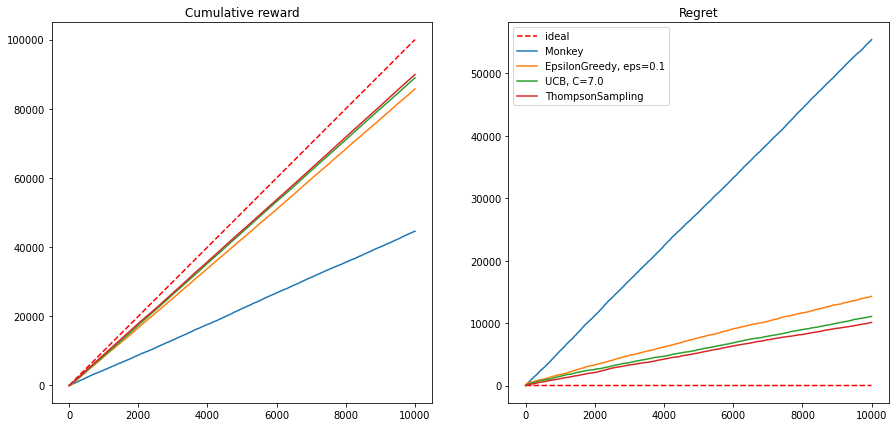

In [ ]:
bandits = [
    GaussBandit(i, 2) for i in range(10)
]

N = 10
eps = 0.1
C = 7.
algorithms = [
    Monkey(N),
    EpsilonGreedy(eps, N),
    UCB(C, N),
    ThompsonSampling([2] * N, N)
]



steps = 10000
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
ax1 = axes[0]
ax1.set_title("Cumulative reward")
ax1.plot(np.arange(steps), 10 * np.arange(steps), "--r", label="ideal")
ax2 = axes[1]
ax2.set_title("Regret")
ax2.plot(np.arange(steps), np.zeros(steps), "--r", label="ideal")

for algorithm in algorithms:
    reward_history = run_experiment(bandits, algorithm, steps)
    regret = 10 * np.arange(1, steps + 1) - reward_history
    ax1.plot(reward_history, label=str(algorithm))
    ax2.plot(regret, label=str(algorithm))
    plt.legend()


## 4. Бизнес

Представьте, что вы продаете какой-то товар на онлайн площадке, и хотите оптимизировать цену для максимизации получаемой прибыли. Вы можете выставить любую цену на свой товар, и наблюдать, сколько он получает просмотров и покупок. 

Поскольку число просмотров вы контроллировать не можете, то логично взять отношение покупок к просмотрам $\alpha$ (будем называть эту величину конверсией), и умножить ее на получаемую прибыть с одной покупки, которая равна $p - p_0$, где $p$ - цена за товар, а $p_0$ - его себестоимость.

Таким образом, вы хотите решить оптимизационную задачу

$$\alpha(p) \cdot (p - p_0) \to \max\limits_p$$

где функцию $\alpha$ (вообще говоря, случайную) вы не знаете, но можете оценить, выставляя разную цену. Для удобства давайте считать, что вы выставляете цену $p_t$ раз в день, и вечером получаете реацию $\alpha_t = \alpha(p_t)$ и награду $\alpha_t (p_t - p_0)$.

Допустим, вы решили моделировать спрос при помощи экспоненциального распределения, то есть предполагаете, что при цене $p$ покупатель, зашедший к вам на страницу купит товар с вероятностью $\exp(- \lambda p)$, где $\lambda$ - некоторая константа, не зависящая ни от цены, ни от номера дня $t$. 


В такой постановке задачи можно в качестве возможных **действий** использовать не множество цен, а множество возможных $\lambda$. То есть вы выбираете одну из моделей спроса, действуете исходя из нее и получаете в конце дня некую прибыль. Тогда выбор модели - это action, а прибыль - reward. 

- Реализуйте предложенный алгоритм
- Найдите теоретически оптимальную цену и отрисуйте график регрета получившегося алгоритма. Растет ли он быстрее/медленнее линейной функции -- $\tilde{O}(\sqrt{T})$?
- Оцените время сходимости в зависимости от количества покупок в день
- прочитайте эту любопытную статью про динамическое ценообразование: https://blog.griddynamics.com/dynamic-pricing-algorithms/, https://hamsabastani.github.io/metapricing.pdf


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
real_lambda = 1 / 42
real_price = 0.
def get_conversion(price, n_people, lambd):
    prob_of_buying = np.exp(-lambd * price)
    n_buys = np.random.binomial(n_people, prob_of_buying)
    return n_buys * 1.0 / n_people

In [ ]:
possible_lambdas = 1.0 / np.arange(1, 101)
apriory_probs = np.ones_like(possible_lambdas)
apriory_probs = apriory_probs / apriory_probs.sum()

In [ ]:
class ThompsonDemand:
  def __init__(self, possible_lambdas: np.ndarray, 
                     apriory_probs: np.ndarray, 
                     n_people: int):
    self.lambdas = possible_lambdas
    self.alpha = np.ones_like(possible_lambdas) * 10.
    self.beta = np.ones_like(possible_lambdas) * 1.
    self.rewards = apriory_probs
    self.n_people = n_people
    
  
  def update(self, lambda_idx: float, reward: float):
    self.rewards[lambda_idx] += reward
    self.alpha[lambda_idx] += 1
    self.beta[lambda_idx] += self.rewards[lambda_idx]
    
  def suggest_price(self):
    price = np.random.gamma(self.alpha, 1. / self.beta)
    alpha = np.exp(-self.lambdas * price) * price 
    lambda_index = np.argmax(alpha)
    return lambda_index, max(price)
  
  def __str__(self):
        return f"{self.__class__.__name__}"

In [ ]:
def run_business(
                    days: int = 1000,
                    n_people: int = 10, # how many people views your product per day
                 ):
  ai_manager = ThompsonDemand(possible_lambdas, apriory_probs, n_people)

  reward_history = []
  parameters_list = []  
  for n_day in range(days):
    lambda_index, price = ai_manager.suggest_price()
    conversion = get_conversion(price, n_people, lambd = real_lambda)

    reward = conversion * (price - real_price)

    ai_manager.update(lambda_index, reward)

    reward_history.append(reward)
    parameters_list.append(abs(real_lambda - possible_lambdas[lambda_index]))
  reward_history = np.cumsum(reward_history)
  
  return reward_history, np.mean(parameters_list)

MAE in λ prediction: 0.08984149176460522


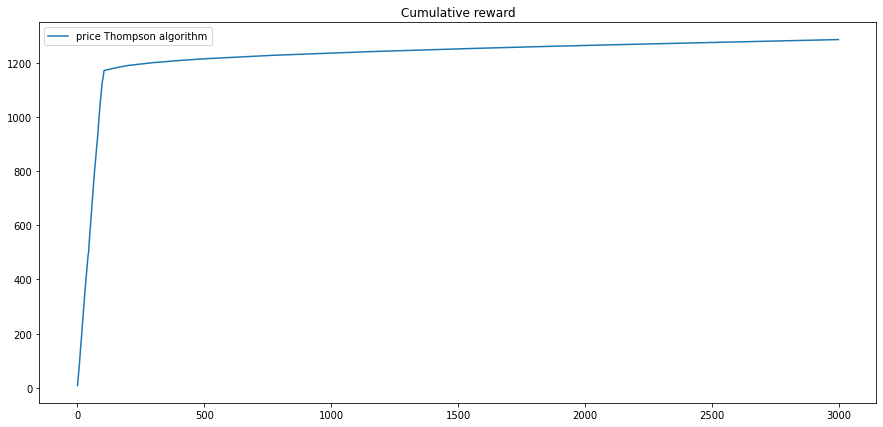

In [ ]:
days = 3000
n_people =15

# price = np.random.poisson(1/ real_lambda, size = 1)[0]
# conversion = get_conversion(price, n_people, lambd = real_lambda)
# reward = conversion * (price - real_price)
reward_history, mae_lambda = run_business(days, n_people)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
ax1 = axes
ax1.set_title("Cumulative reward")
# ax1.plot(np.arange(days), parameters_list * np.arange(1, days + 1), "--r", label="ideal")
# ax2 = axes[1]
# ax2.set_title("Regret")
# ax2.plot(np.arange(days), np.zeros(days), "--r", label="ideal")
print(r"MAE in the λ prediction:", mae_lambda)
# regret = reward * np.arange(1, days + 1) - reward_history
ax1.plot(reward_history, label="price Thompson algorithm")
ax2.plot(regret, label="price Thompson algorithm")
plt.legend()


Хотелось бы обратить внимание, что задача одновременно сформулирована так, что нужно искать значение λ и значения α($p_t$), то есть распределение цен, что я не совсем понимаю, как делать. Единственное, до чего я додумался, -- это пресказывать price как Г-распределение, сопряжённое распредению цен, которое я предположил пуассовским. Задача очень похожа на задачу линейного программирования, но в ссылке к заданию даны цены и нужно искать параметры и не до конца понятно, как сделать наоборот.